In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time
import timeit

In [10]:
# arrays needed only for the graph


k_values = []
dev_error_rates_naive = []
dev_error_rates_smart = []
dev_error_rates_smart_scaled = []

In [41]:
#### Run one of the methods, comment out the other 2, repeat with all 3


# NAIVE METHOD


# train_data = pd.read_csv("income.train.txt.5k", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# encoder.fit(train_data)                                         #  you only fit the encoder once (on training)
# binary_train_data = encoder.transform(train_data)              #  but use it to transform training, dev, and test sets
# # print(f"training data: {binary_train_data}")
# dev_data = pd.read_csv("income.dev.txt", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])
# binary_dev_data = encoder.transform(dev_data)                   #  but use it to transform training, dev, and test sets
# # print(f"dev data: {binary_dev_data}")



# # grab the training outputs/labels from the training data and put it into a "target vector" y_train
# y_train = []
# for row in binary_train_data:
#     y_train.append(row[231])
# y_train = np.array(y_train)
# # print(y_train)


# # set up the "feature matrix" x_train by taking out the labels from the training data
# x_train = []
# for row in binary_train_data:
#     x_train.append(row[:230])
# x_train = np.array(x_train)
# # print(x_train)


# # grab the training outputs/labels from the training data and put it into a "target vector" y_train
# y_dev = []
# for row in binary_dev_data:
#     y_dev.append(row[231])
# y_dev = np.array(y_dev)
# # print(y_train)


# # set up the "feature matrix" x_train by taking out the labels from the training data
# x_dev = []
# for row in binary_dev_data:
#     x_dev.append(row[:230])
# x_dev = np.array(x_dev)
# # print(x_train)



##############################################################
##############################################################
##############################################################



# SMART METHOD


# # instantiate pre-processing methods for numerical & categorical
# num_processor = 'passthrough'       # i.e., no transformation, don't do anything, no scaling yet
# cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# # read in the data from csv
# # data = pd.read_csv("toy.txt", sep=", ", names=["age", "sector"])
# train_data = pd.read_csv("income.train.txt.5k", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])
# dev_data = pd.read_csv("income.dev.txt", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])

# # fit the pre-processor to the dataset and transform it
# preprocessor = ColumnTransformer([
#     ('num1', num_processor, ['age']),
#     ('cat1', cat_processor, ['sector']),
#     ('cat2', cat_processor, ['edu']),
#     ('cat3', cat_processor, ['marriage']),
#     ('cat4', cat_processor, ['occupation']),
#     ('cat5', cat_processor, ['race']),
#     ('cat6', cat_processor, ['sex']),
#     ('num2', num_processor, ['hours']),
#     ('cat7', cat_processor, ['country']),
#     ('cat8', cat_processor, ['target'])
# ])

# preprocessor.fit(train_data)
# processed_train_data = preprocessor.transform(train_data)
# processed_dev_data = preprocessor.transform(dev_data)    # we don't FIT our processor to dev, but we do transform our dev set


# # grab the training outputs/labels from the training data and put it into a "target vector" y_train
# y_train = []
# for row in processed_train_data:
#     y_train.append(row[93])
# y_train = np.array(y_train)
# # print(y_train)

# # set up the "feature matrix" x_train by taking out the labels from the training data
# x_train = []
# for row in processed_train_data:
#     x_train.append(row[:92])
# x_train = np.array(x_train)
# # print(x_train)

# # grab the training outputs/labels from the training data and put it into a "target vector" y_train
# y_dev = []
# for row in processed_dev_data:
#     y_dev.append(row[93])
# y_dev = np.array(y_dev)

# # set up the "feature matrix" x_train by taking out the labels from the training data
# x_dev = []
# for row in processed_dev_data:
#     x_dev.append(row[:92])
# x_dev = np.array(x_dev)




##############################################################
##############################################################
##############################################################



# SMART-SCALED METHOD



# now we scale/normalize the numerical fields
num_processor = MinMaxScaler(feature_range=(0, 2))
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# read in the data from csv
train_data = pd.read_csv("income.train.txt.5k", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])
dev_data = pd.read_csv("income.dev.txt", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])

# fit the pre-processor to the dataset and transform it
preprocessor = ColumnTransformer([
    ('num1', num_processor, ['age']),
    ('cat1', cat_processor, ['sector']),
    ('cat2', cat_processor, ['edu']),
    ('cat3', cat_processor, ['marriage']),
    ('cat4', cat_processor, ['occupation']),
    ('cat5', cat_processor, ['race']),
    ('cat6', cat_processor, ['sex']),
    ('num2', num_processor, ['hours']),
    ('cat7', cat_processor, ['country']),
    ('cat8', cat_processor, ['target'])
])

preprocessor.fit(train_data)
processed_train_data = preprocessor.transform(train_data)
processed_dev_data = preprocessor.transform(dev_data)    



# grab the training outputs/labels from the training data and put it into a "target vector" y_train
y_train = []
for row in processed_train_data:
    y_train.append(row[93])
y_train = np.array(y_train)
# print(y_train)

# set up the "feature matrix" x_train by taking out the labels from the training data
x_train = []
for row in processed_train_data:
    x_train.append(row[:92])
x_train = np.array(x_train)
# print(x_train)

# grab the training outputs/labels from the training data and put it into a "target vector" y_train
y_dev = []
for row in processed_dev_data:
    y_dev.append(row[93])
y_dev = np.array(y_dev)

# set up the "feature matrix" x_train by taking out the labels from the training data
x_dev = []
for row in processed_dev_data:
    x_dev.append(row[:92])
x_dev = np.array(x_dev)


/var/folders/bb/rwf_bc6n7hjbvrbbxm8rwkd00000gn/T/ipykernel_8638/4279952754.py:134: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("income.train.txt.5k", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])
/var/folders/bb/rwf_bc6n7hjbvrbbxm8rwkd00000gn/T/ipykernel_8638/4279952754.py:135: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dev_data = pd.read_csv("income.dev.txt", sep=", ", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"])


In [42]:
k_values = []
dev_error_rates_smart_scaled = []


for i in range(100):
    if not i % 2: 
        continue
    else:
        k = i
        k_values.append(k)
        knn = KNeighborsClassifier(n_neighbors = k)     # try odd k-values from 1 to 100
        knn.fit(x_train, y_train)      


        
### predict on Training Data
        
#         # y_pred = knn.predict(test_data)    
#         start = time.time()
#         y_train_pred = knn.predict(x_train)    
#         end = time.time()
#         # print("k value is:  ", k)
#         # print(f"time elapsed: {end - start}")
#         # print(f"target vector: {y_train_pred}")
#         # print(f"len of target vector: {len(y_train_pred)}")
#         pos_train = 0
#         for val in y_train_pred:
#             if val: pos_train += 1
#         # print(f"percentage predicted pos: {pos_train}/5000 = {pos_train/5000}")
#         train_accuracy = accuracy_score(y_train, y_train_pred)      # calc the training accuracy
#         # print(f"Training Accuracy: {train_accuracy}")
#         # print()
#         # print()


        
### Predict on Dev Data

        start = time.time()
        y_dev_pred = knn.predict(x_dev)    
        end = time.time()

        pos_dev = 0
        for val in y_dev_pred:
            if val: pos_dev += 1
        # print(f"percentage predicted pos: {pos_dev}/1000 = {pos_dev/1000}")
        dev_accuracy = accuracy_score(y_dev, y_dev_pred)            # calc the DEV accuracy
        #dev_accuracies.append( (dev_accuracy, k) )
        # print(f"Dev Accuracy: {dev_accuracy}")




#### comment these out based on which kNN you are running above:

        # dev_error_rates_naive.append( round((1 - dev_accuracy) * 100, 1) )
        # dev_error_rates_smart.append( round((1 - dev_accuracy) * 100, 1) )
        dev_error_rates_smart_scaled.append( round((1 - dev_accuracy) * 100, 1) )



        
        print(f"k = {k}  train_err {round((1 - train_accuracy) * 100, 1)}% (+: {round((pos_train/5000) * 100, 1)}%)   dev_err {round((1 - dev_accuracy) * 100, 1)}%  (+: {round((pos_dev/1000) * 100, 1)}%)")

print(" ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")
print(" ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")
print(" ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")


print(f" k_values: {k_values} ")
print(f" naive_values: {dev_error_rates_naive} ")
print(len(dev_error_rates_naive))
print(f" smart_values: {dev_error_rates_smart} ")
print(len(dev_error_rates_smart))
print(f" smart_scaled_values: {dev_error_rates_smart_scaled} ")
print(len(dev_error_rates_smart_scaled))

k = 1  train_err 18.1% (+: 17.5%)   dev_err 23.8%  (+: 27.0%)
k = 3  train_err 18.1% (+: 17.5%)   dev_err 19.3%  (+: 25.9%)
k = 5  train_err 18.1% (+: 17.5%)   dev_err 18.0%  (+: 24.4%)
k = 7  train_err 18.1% (+: 17.5%)   dev_err 16.7%  (+: 24.1%)
k = 9  train_err 18.1% (+: 17.5%)   dev_err 15.7%  (+: 22.5%)
k = 11  train_err 18.1% (+: 17.5%)   dev_err 16.3%  (+: 20.7%)
k = 13  train_err 18.1% (+: 17.5%)   dev_err 16.2%  (+: 21.8%)
k = 15  train_err 18.1% (+: 17.5%)   dev_err 15.9%  (+: 21.7%)
k = 17  train_err 18.1% (+: 17.5%)   dev_err 15.9%  (+: 21.7%)
k = 19  train_err 18.1% (+: 17.5%)   dev_err 16.3%  (+: 20.9%)
k = 21  train_err 18.1% (+: 17.5%)   dev_err 15.8%  (+: 21.0%)
k = 23  train_err 18.1% (+: 17.5%)   dev_err 15.4%  (+: 21.8%)
k = 25  train_err 18.1% (+: 17.5%)   dev_err 15.2%  (+: 21.6%)
k = 27  train_err 18.1% (+: 17.5%)   dev_err 15.4%  (+: 20.6%)
k = 29  train_err 18.1% (+: 17.5%)   dev_err 15.1%  (+: 20.7%)
k = 31  train_err 18.1% (+: 17.5%)   dev_err 15.1%  (+: 20.9

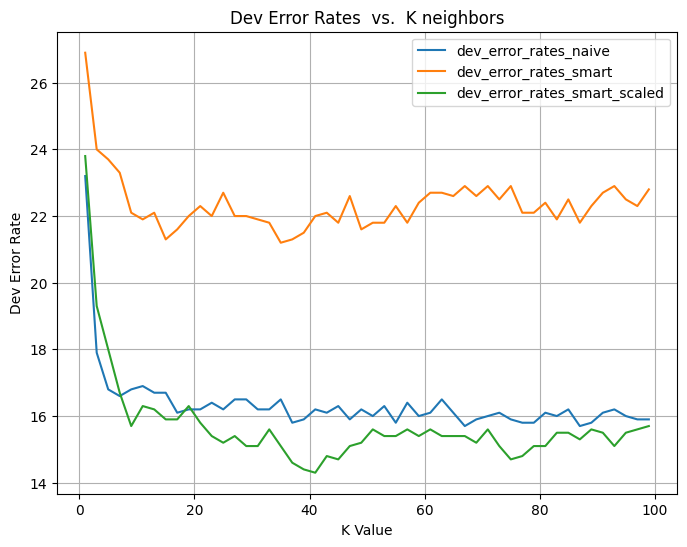

In [43]:
# first, load all of those arrays of dev_error_rates separately, then plot


# Create the plot
plt.figure(figsize=(8, 6))

# Plot the data for each implementation
plt.plot(k_values, dev_error_rates_naive, label='dev_error_rates_naive')
plt.plot(k_values, dev_error_rates_smart, label='dev_error_rates_smart')
plt.plot(k_values, dev_error_rates_smart_scaled, label='dev_error_rates_smart_scaled')

# Customize the plot
plt.title('Dev Error Rates  vs.  K neighbors')
plt.xlabel('K Value')
plt.ylabel('Dev Error Rate')
plt.legend()

# Display the plot
plt.grid()
plt.show()